Dengue Fever is a mosquito-borne viral infection that causes fever, rash, headache, and muscle pain. It is most common in tropical and sub-tropical regions, where climate conditions support mosquito populations.

DataDriven is a Kaggle-like website that collects data sets and creates challenges. The [DengAI challenge from DataDriven](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/) has collected data on dengue cases and environmental variables such as temperature and precipitation.

Make an accout on DataDriven and download the DengAI data. Look at the competition information to understand the features of the data. 

Load the training data. Remove feature columns that we won't use for prediction: city, year, and week start date. Replace any missing values with mean values. 


In [126]:
# Import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error


In [127]:
# Import train and test data 
train_path = 'data/dengue_features_train.csv'
test_path = 'data/dengue_features_test.csv'
labels_path = 'data/dengue_labels_train.csv'
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
labels_df = pd.read_csv(labels_path)

In [128]:
# Remove feature column that will not be used for prediction: city, year and week start date from train data 
train_df = train_df.drop(['city', 'year', 'week_start_date'], axis=1)
test_df = test_df.drop(['city', 'year', 'week_start_date'], axis=1)
labels_df = labels_df.drop(['city', 'year', 'weekofyear'], axis=1)

In [129]:
# Find columns with missing values to find mean and impute 
null_col = train_df.columns[train_df.isnull().any()].tolist()

# Fill null values with the mean value of the column 
for col in null_col:
    train_df[col].fillna(int(train_df[col].mean()), inplace=True)

Divide the training data into a training set (80% of the data) and a validation set (20%) *Hint: make sure you do these the same way for the features and labels*. You will use the validation set to compare performance across models. 

In [130]:
# Split train data 
X_train, X_test, y_train, y_test = train_test_split(train_df, labels_df, test_size=0.2, random_state=0)

Train a linear regression model on the training data and evaluate its performance on the validation set according to the mean absolute error. Make a scatter plot of the predicted and true case counts for the validation set.  


In [131]:
# Data Preprocessing
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Train a linear regression model on the training data 
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction values 
y_pred = model.predict(X_test)

# Validation
MAE = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Linear Regression Model: {MAE:.2f}")


Mean Absolute Error for Linear Regression Model: 22.96


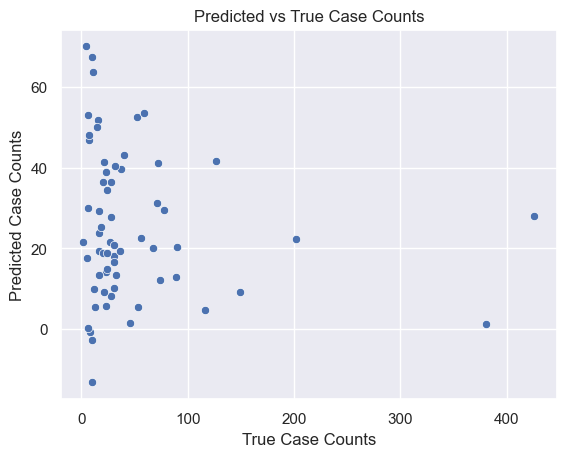

In [132]:
# Create Scatterplot 

y_pred = pd.DataFrame(y_pred, columns=['total_cases'])

# Set seaborn figure
sns.set(style="darkgrid")

# Scatterplot 
sns.scatterplot(x=y_test['total_cases'], y=y_pred['total_cases'])
plt.xlabel("True Case Counts")
plt.ylabel("Predicted Case Counts")
plt.title("Predicted vs True Case Counts")
plt.show()

**Extra Credit**: Use [scikit-learn's Poisson GLM method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html) on this data. Report mean absolute error on the validation set. Explain why this model is more appropriate than linear regression for this task. 


In [137]:
glm_model = PoissonRegressor(alpha=1.0, max_iter=100)
glm_model.fit(X_train, y_train.values.reshape(-1))
y_pred = glm_model.predict(X_test)
GLM_MAE = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Poisson GLM model: {GLM_MAE:.2f}")

Mean Absolute Error for Poisson GLM model: 20.38


Here you will train an artificial neural network to perform this task. You can use the [multi-layer perceptron model](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), which is a simple feedforward neural network. You can vary the architecture of the network using the hidden_layer_sizes parameter. 

Try out at least 3 different depths (number of hidden layers) and 3 different widths (number of units in each layer). Pick the model that performs the best on the validation set and upload its predictions on the test set to the DataDriven competition page according to the provided submission format. Include a screenshot of your performance. Do the same for the model that performed the worst on the validation set. Does validation performance relate to test performance for you? 

*Note: the submission requires total_cases be an integer*